# Linear Regression 

In this example, we will learn how to train a very basic linear regression model with **scikit-learn**. <br/>
Furthermore, we will also practice analyzing data with Pandas.

#### Dataset: California Housing

As an example dataset we will use the California Housing dataset. The data contains information from the 1990 California census.  A description of this dataset can be found here: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Fortunately, the dataset is already provided in scikit-learn. So, there is no need to fetch the data from Kaggle manually. See: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [1]:
# Import modules which are relevant for this project
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

## Load the dataset

In [2]:
# as_frame: 
# If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric, string or categorical). 
# The target is a pandas DataFrame or Series depending on the number of target_columns.
dataset = fetch_california_housing(as_frame=True)

In [3]:
# Check what keys are available.
# We are interested in <data> and <target>
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [4]:
housing_df = dataset['data']
target_df = dataset['target']

## Analyze the data

Since we have now successfully loaded the data, our first step will be to get an understanding of our data. 

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


As can be seen, there are 20640 instances in the dataset, which means that it is fairly small by
Machine Learning standards, but sufficient to get started. Each instance is described by 8 columns (values).
This immediately raises the question of what these columns represent. Fortunately, the `dataset` provides some information about these columns.

Apparently, the provided data contains no non-null (incl. NaN) values. So we don't have to take care of them.

In [6]:
print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Ok, so according to the description, the target variable is the media house value. This value needs to be multiplied by $100.000 in order to obtain the actual value.

To simplify the upcoming analysis, we will add `target_df ` as a new column to `housing_df`. <br/>
For the sake of consistency, we refer to it as `HousePrice`.

In [7]:
housing_df['HousePrice'] = target_df

Let's take a closer look at the values in `housing_df`.

In [8]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Looking at the mean and median values, we can already gain some information about the distribution of the data and whether they are skewed.

Recall that if a distribution is **left-skewed**, it has a tail on the left which means that the Mean < Median < Mode. <br/>
If it's **right-skewed**, it has a tail on the right which means that Mode < Median < Mean.

However, we typically get a better understanding if we visualize the data. Let's take a look at the histograms.

As we have learned previously, one way to do this is with pandas' `plot()` function. Let's look at some individual features.

<Axes: title={'center': 'MedInc'}, ylabel='Frequency'>

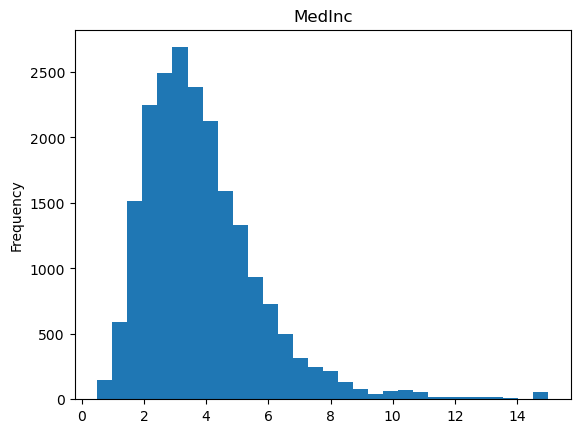

In [9]:
housing_df['MedInc'].plot(kind='hist', bins=30, title='MedInc')

<Axes: title={'center': 'HousePrice'}, ylabel='Frequency'>

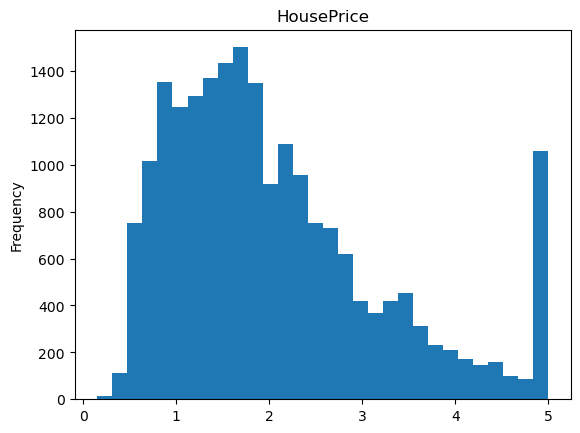

In [10]:
housing_df['HousePrice'].plot(kind='hist', bins=30, title='HousePrice')

However, doing this for every feature individually is a little bit inconvenient. Luckily, there is a faster way to do this for all features.

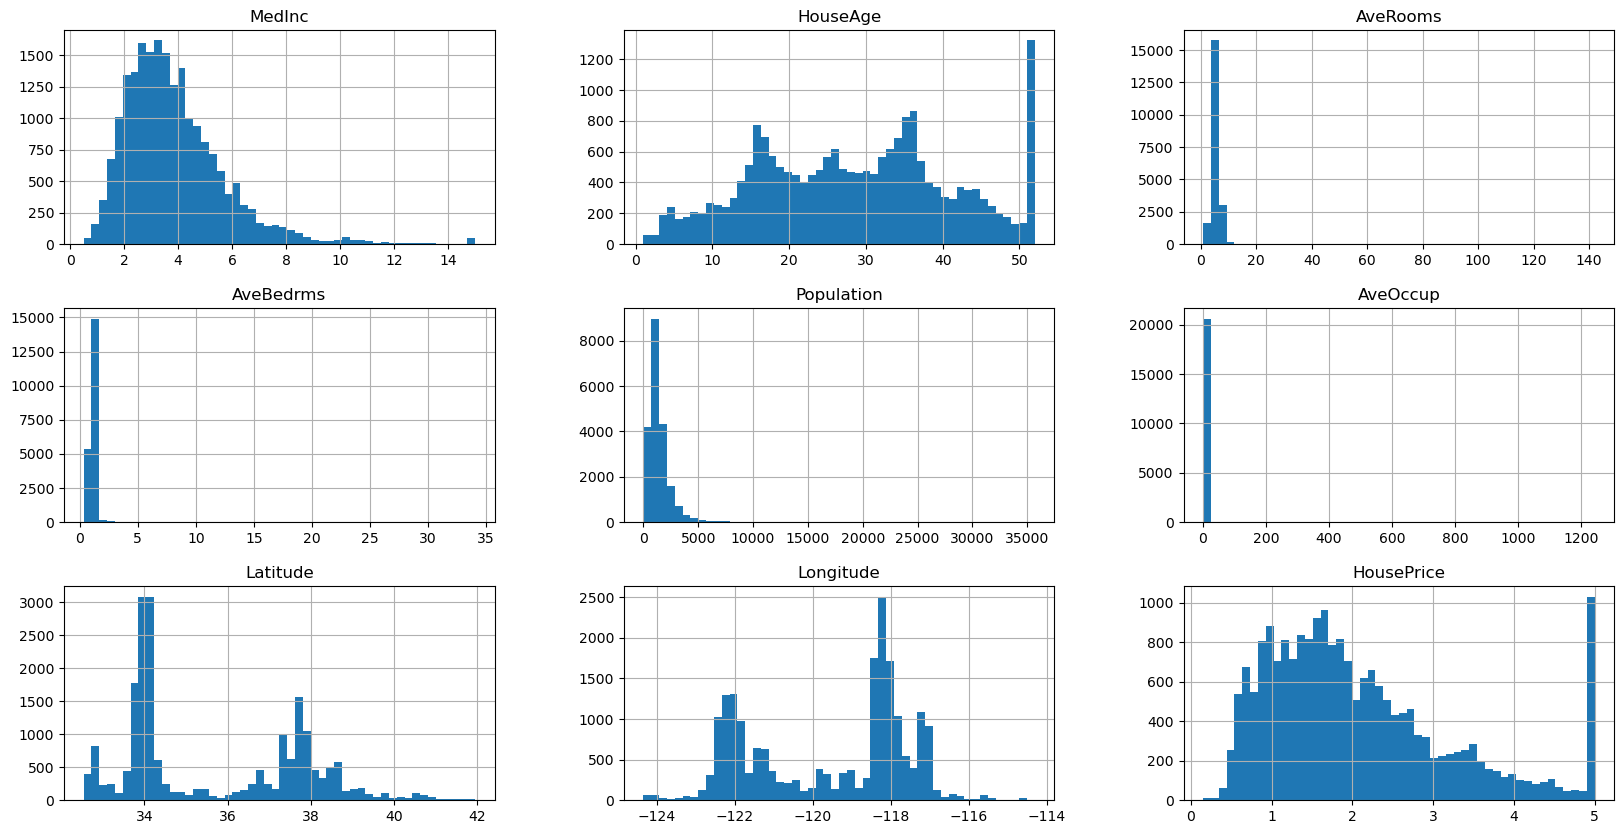

In [11]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
# Uses matplotlib to create one histogram per colum
# Important: Do not forget to change the number of bins as bins=10 (default) is pretty useless
hist = housing_df.hist(bins=50, figsize=(20, 10))

We can immediately notice a bunch of interesting things in this plot. 
    
- **HouseAge and HousePrice seem to be capped** (notice the spike at the tail). The latter may be a serious problem since it is your target attribute (your labels). Your
Machine Learning algorithms may learn that prices never go beyond that limit. As a result we might have to think of removing the affected rows from the training set (and eventually also from the test set, since
your system should not be evaluated poorly if it predicts values beyond $500,000)
- The attributes all have different scales.
- Many histograms are tailed.


Since our goal is to train a linear regression model, it's important to understand which colums well correlated with the house price. <br/>
A fast way to obtain this informations is by computing the pairwise correlations between the columns.

In [12]:
# Compute pairwise correlation of columns, excluding NA/null values.
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
HousePrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Alternatively, we can use [Seaborn](https://seaborn.pydata.org/index.html) to graphically visualize the correlation matrix. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

<Axes: >

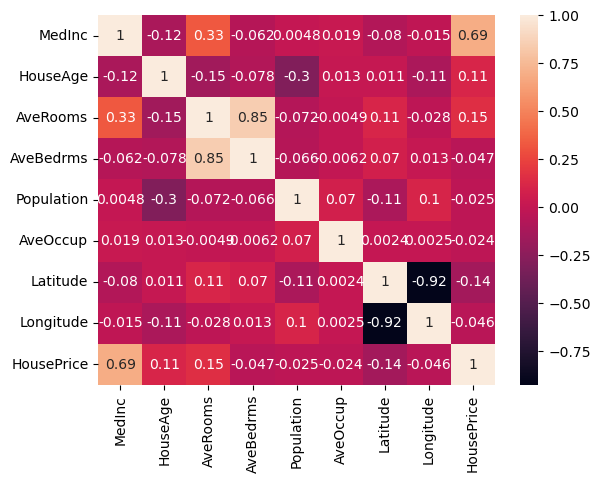

In [13]:
sns.heatmap(housing_df.corr(), annot=True)

The **Person Correlation coefficient** is a way to measure how correlated to variables are. A value close to 1 indicates that two variables exhibit perform positive correlation. A values close to -1 indicates perfect negative correlation. See: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

We are primarily interested in the correlation of each variable with `HousePrice`. So let's do some filtering. <br/>
What we would like to see are values close to 1 or -1.

In [14]:
housing_df.corr()['HousePrice'].sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: HousePrice, dtype: float64

Considering the correlation coefficients, we can conclude that `MedInc` has the highest correlation with `HousePrice`. So, if we had to choose a single variable to train our predictor, `MedInc` is a good starting point.

To get a better understanding of the influence of `MedInc` on `HousePrice` we can visualize both variables in a scatter plot.

<Axes: xlabel='MedInc', ylabel='HousePrice'>

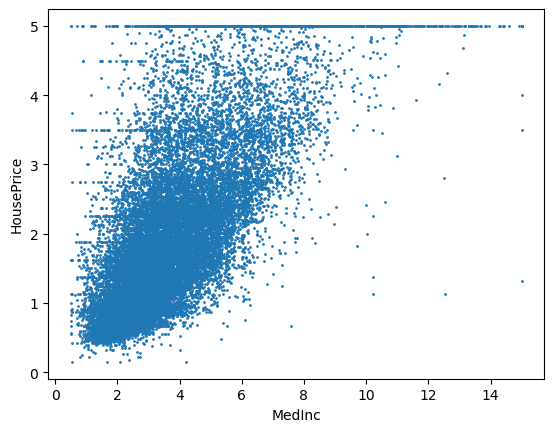

In [15]:
housing_df.plot(kind='scatter', x='MedInc', y='HousePrice', s=1)

The plot reveals a few things. First, the correlation is indeed very strong; We can clearly see the upward trend, and the points are not too dispersed. Second, the price cap that we noticed earlier is clearly visible as a horizontal line at 5 (\\$500000). But this plot reveals other less obvious straight lines: a horizontal line around 4.5 (\\$450000), another around 3.5 (\\$350000), perhaps one around 2.8 (\\$280000), and a few more below that. We may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks at a later stage (in the case of our simple linear regression, they probably won't matter).

## Preview: Train our first linear regression model

To get familiar with linear regression models, we will now train our first linear regressor on two variables only (`MedInc` and `HousePrice`). In this notebook, we will not split the dataset into two subsets (train and test). This will be done in the next notebook. For now, we only care how a linear regression can be created and trained with scikit-learn.

I recommend taking a look at the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

This page provides some nice examples that show how to fit a line to some points: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [16]:
reg_model = LinearRegression()

# Prepare the data that should be used to train the regression model
# At the moment we only want to use MedInc and HousePrice
x_train = housing_df['MedInc'].values.reshape(-1, 1)
y_train = housing_df['HousePrice'].values.reshape(-1, 1)

# Train the model
reg_model.fit(x_train, y_train)

LinearRegression()

That's it, we just trained your first model. Let's take a look at its predictions.

In [17]:
# Sample points at regular intervals
x_line = np.arange(0, 10, 0.01).reshape(-1, 1)

# Use the model to predict the points on the line
y_line = reg_model.predict(x_line)

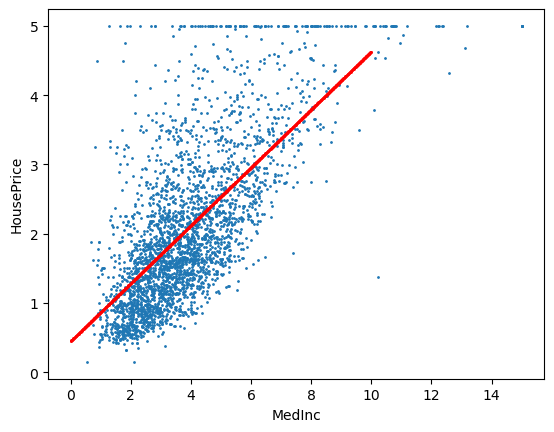

In [18]:
ax = housing_df.sample(3000).plot(kind='scatter', x='MedInc', y='HousePrice', s=1)
ax.scatter(x_line, y_line, c='red', s=1)

In [19]:
# Finally, let's compute the root mean squared error to quantify how well the model is doing

# Params: y_true, y_pred
# Settings squared to false returns the RMSE
rmse = mean_squared_error(y_train, reg_model.predict(x_train), squared=False)

In [20]:
print(rmse)

0.8373357452616917


Alternatively, we could also calculate the MSE (Mean Squared Error) and take the square root ourself.

In [21]:
rmse = np.sqrt(mean_squared_error(y_train, reg_model.predict(x_train)))

In [22]:
# Params: y_true, y_pred
mse = mean_squared_error(y_train, reg_model.predict(x_train), squared=True)
print(np.sqrt(mse))

0.8373357452616917


In [23]:
print(rmse * 100000)
print(housing_df['HousePrice'].quantile(0.25)*100000)
print(housing_df['HousePrice'].quantile(0.5)*100000)
print(housing_df['HousePrice'].quantile(0.75)*100000)

83733.57452616918
119600.0
179700.0
264724.99999999994


Our model has a prediction error of \\$83733. This is pretty bad considering that most house prices are in the range of \\$120k and \\$265k. 